In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style='whitegrid')

In [ ]:
df=pd.read_csv('/content/us_credit_dataset.csv')

In [ ]:
df.head()

,Customer_ID,Age,Gender,State,Education_Level,Annual_Income,Credit_Limit,Avg_Monthly_Spend,Num_Late_Payments,Credit_Utilization_Rate,Employment_Type,Credit_Score
0,USCUST100000,59,Female,Illinois,Bachelor’s Degree,66596,16202,1512,2,1.12,Full-Time,400
1,USCUST100001,72,Female,California,Associate Degree,96799,19004,2109,1,1.33,Retired,397
2,USCUST100002,49,Male,Michigan,Master’s Degree,58504,20415,1133,1,0.67,Full-Time,558
3,USCUST100003,35,Female,Georgia,High School,43591,11057,1280,1,1.39,Part-Time,326
4,USCUST100004,63,Female,California,Master’s Degree,80477,24745,1883,3,0.91,Full-Time,446


Text(0, 0.5, 'Number of Customers')

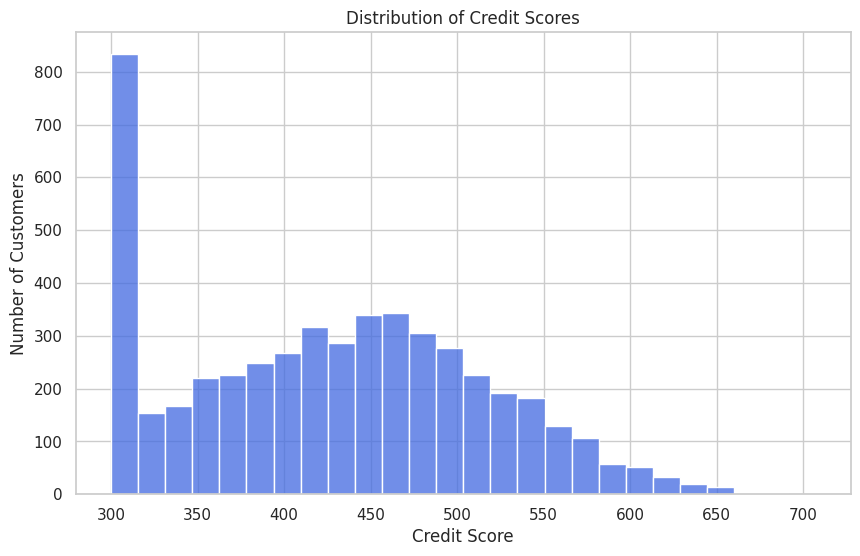

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Credit_Score'],color='Royalblue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')


In [ ]:
#Business insight: credit score distribution, Most scores lie between **400 and 500**,
# with a healthy bell shaped curve very low and very high scores should be considered as outliers for the consistency of our calculation.
#there are some abnormalities in the data i.e low credit score of 300 is showing high (number of customers)so if we remove the 300 credit score from our calculations, we are more likely to achieve a more realisitic view of our data. .

<ipython-input-6-2235377619>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Employment_Type', y='Credit_Score', palette='viridis')


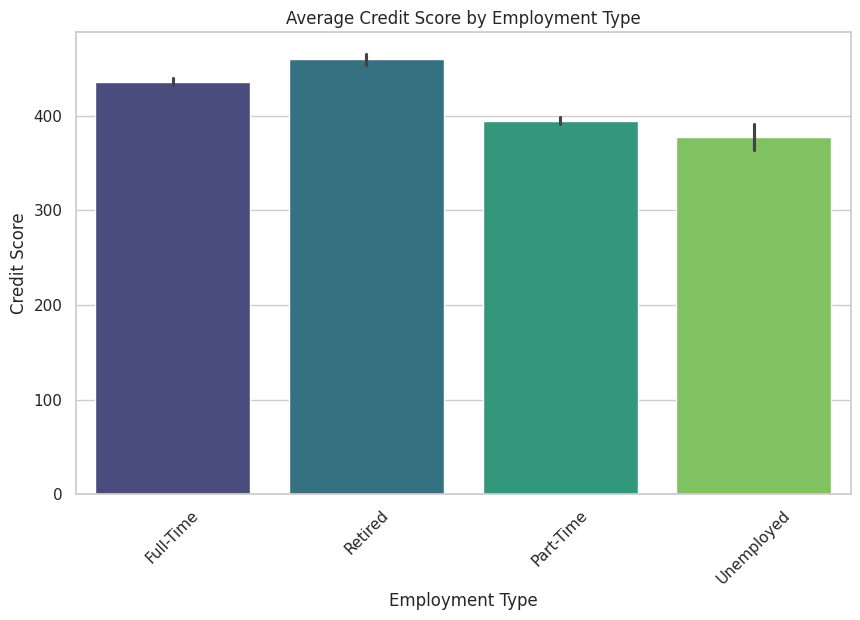

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Employment_Type', y='Credit_Score', palette='viridis')
plt.title('Average Credit Score by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Insight : Employment Type
#Retired and Full- Time workers show higher credit scores, while unemployed and Part-Timers typically score lower due to less financial stability.

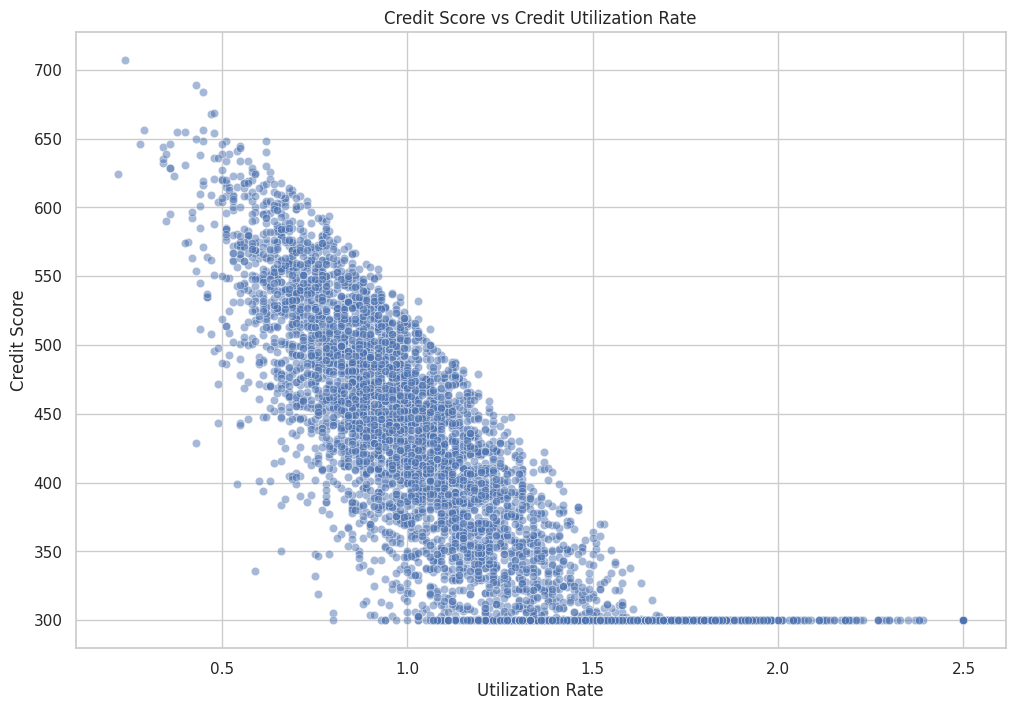

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Credit_Utilization_Rate', y='Credit_Score', alpha=0.5)
plt.title('Credit Score vs Credit Utilization Rate')
plt.xlabel('Utilization Rate')
plt.ylabel('Credit Score')
plt.show()

In [ ]:
#insight: Utilization Rate*(a downword trend)
#A Clear negative correlation appears - higher credit utilization leads to lower credit scores, aligning with real-world credit behaviour.i.e the less utilisation of credit the higher the credit score and vice a versa.

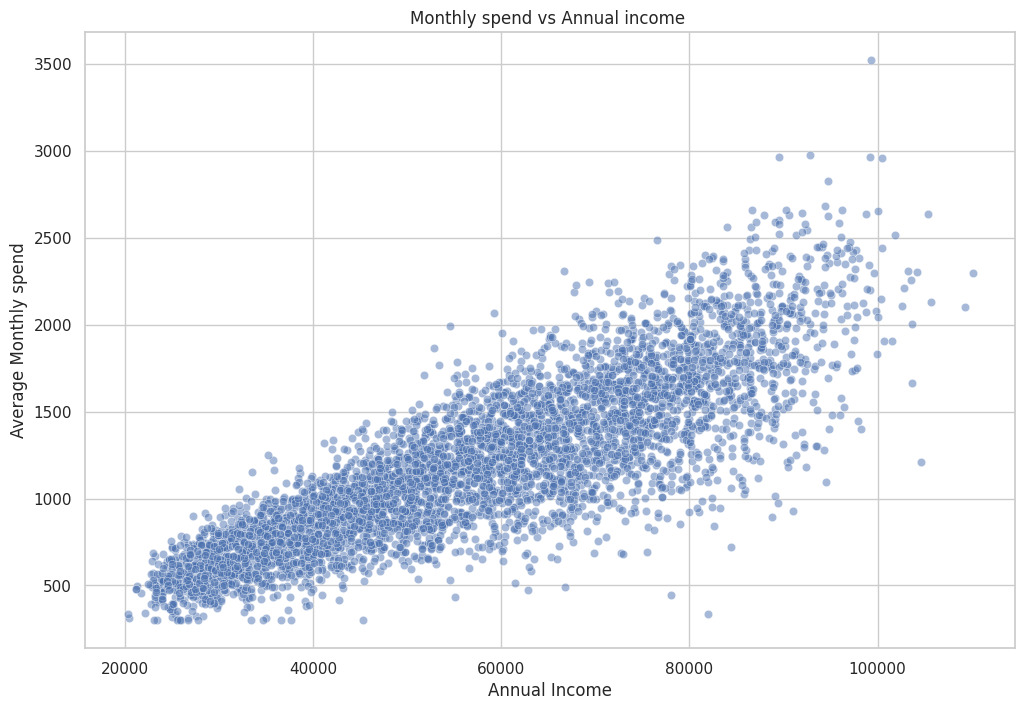

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Annual_Income', y='Avg_Monthly_Spend', alpha=0.5)
plt.title('Monthly spend vs Annual income ')
plt.xlabel('Annual Income')
plt.ylabel('Average Monthly spend')
plt.show()

In [ ]:
# insight:income vs spending
#As income increases,average spend tends to increase, though not linearly.spending habits vary even among the high-income earners.

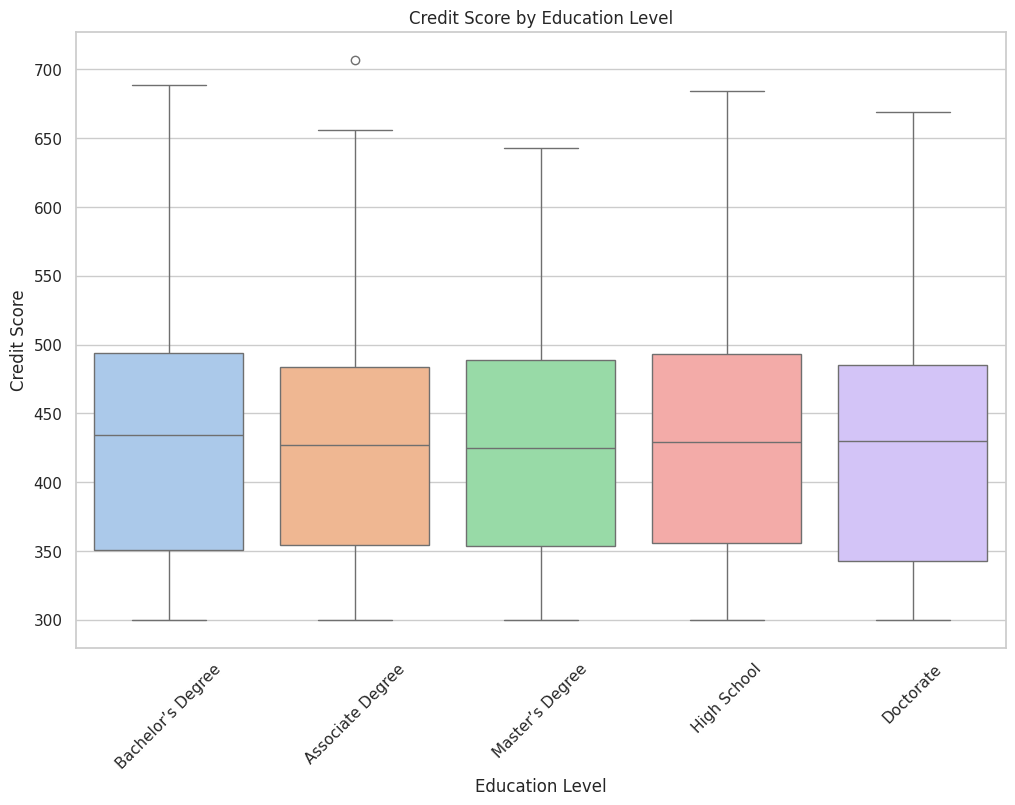

In [ ]:
#box plot to calculate the credit score as per eduction level.
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Education_Level', y='Credit_Score', palette='pastel', hue='Education_Level', legend=False)
plt.title('Credit Score by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#insight:Education level
#Higher education levels show slightly better credit scores on average .the variation within each group suggests other factors also play a role.

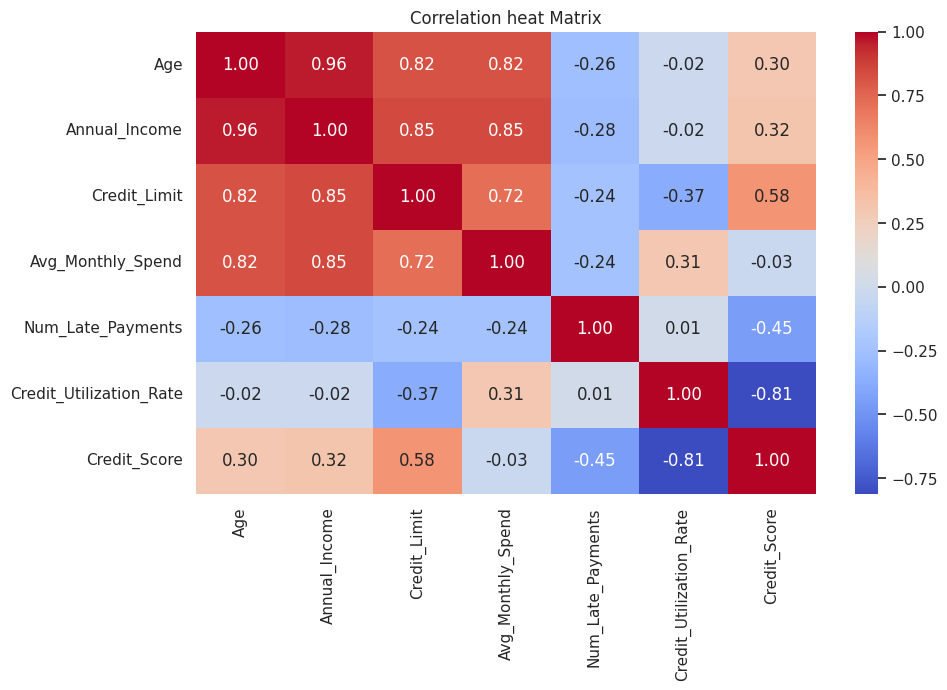

In [ ]:
plt.figure(figsize=(10,6))
corr=df[['Age','Annual_Income','Credit_Limit','Avg_Monthly_Spend','Num_Late_Payments','Credit_Utilization_Rate','Credit_Score']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation heat Matrix')
plt.show()

In [ ]:
#Insights: Correlation Matrix
#Credit_score has strong negative correlations with credit_utilisation_Rate and Late_Payments
#Annual_Income,credit_limit and spend are positively correlated.
# explaination in simple terms:1)age and Credit_Limit are realted in a way where more the age,
# more is the credit_limit as it has 0.82 in the correlation on the other hand if you have paid the late payments (Num_Late_Payments),
#this has a negative impact and it shows on  the matrix.
#age and annual income has a positive relationship.

In [ ]:
# application of machine learning models to start predicting the credit score.

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
# drop unused columns
df_model = df.drop(['Customer_ID', 'Gender', 'State'], axis=1)

In [ ]:
#Encode employment type
df_model=pd.get_dummies(df_model,columns=['Employment_Type'],drop_first=True)

In [ ]:
#Define features and Target
x =df_model.drop(columns=['Credit_Score'])
y=df_model['Credit_Score']

In [ ]:
# train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#feature scaling
scaler

StandardScaler()

In [ ]:
# Select features and target variable
X = df.drop(['Customer_ID', 'Credit_Score'], axis=1)
y = df['Credit_Score']

# Handle categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['State', 'Employment_Type', 'Education_Level', 'Gender'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train the model
model= RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
#Evaluate Performance
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 3.17
Root Mean Squared Error: 5.67
R-squared: 1.00


Text(0.5, 1.0, 'Actual vs Predicted Credit Score')

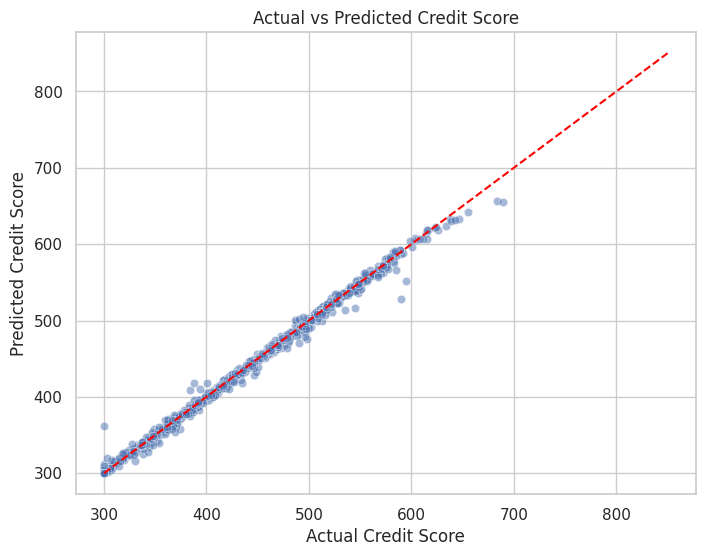

In [ ]:
# Actual Vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred,alpha=0.5)
plt.plot([300,850],[300,850],color='red',linestyle='--')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Score')


In [ ]:
#Insights: Actual v/s Predicted insight
#the scatterplot shows most predictions falling near the diagonal line, indiacating good model accuracy.
# A few Outliers may represen unique customer behaviours not fully captured by our features.
# Overall, the model generalizes well and can estimate credithworthiness with reasonable confidence.


<ipython-input-56-1622178721>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feature_df,palette='viridis')


Text(0.5, 1.0, 'Feature Importance for Predicting credit score')

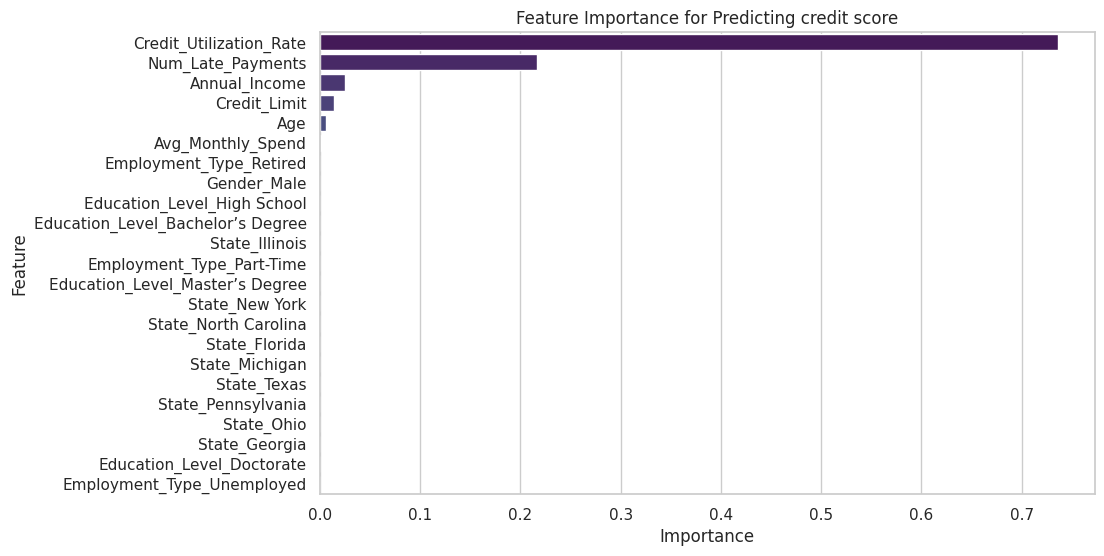

In [ ]:
#feature importance
importances= model.feature_importances_
features=X.columns
feature_df=pd.DataFrame({'Feature':features,'Importance':importances})
feature_df=feature_df.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feature_df,palette='viridis', hue='Feature', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting credit score')

In [ ]:
#Feature importance Insights- 1)Credit Utilization Rate: it is the most importantfeature, it reinforces the real -world importance of responsible credit use.
 #2)Number of Late Payments is also a strong signal- capturing repayment behaviour .
 #3)Annual income and Monthly spend influence score indirectly by reflecting financial capacity.
 #4)Employment type(e.g., full-time,self-emplyed)plays a subtle but valuable role in credit score prediction. these insights reflect industry patterns and help validate the model's authenticity.